<a href="https://colab.research.google.com/github/Paulsob/TelecomLabs/blob/main/Lab10_telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Упражнение 10

In [ ]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

--2025-05-15 08:39:30--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2025-05-15 08:39:30--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48554 (47K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.42K  --.-KB/s    in 0.01s   

2025-05-15 08:39:30 (3.82 MB/s) - ‘thinkdsp.py’ saved [48554/48554]



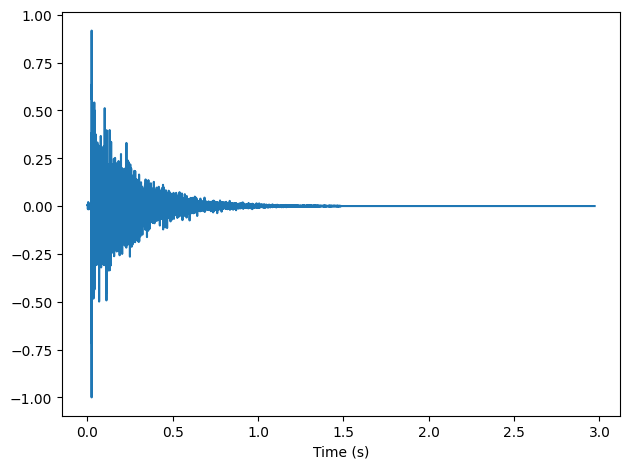

In [ ]:
from thinkdsp import read_wave

response = read_wave('180960__kleeb__gunshot.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.truncate(2**16)
response.zero_pad(2**17)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

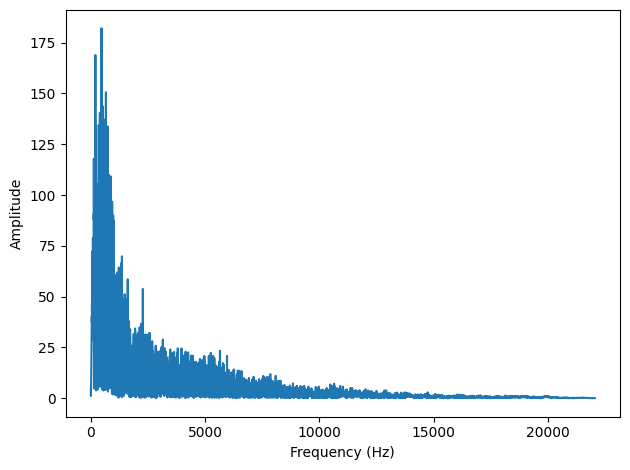

In [ ]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [ ]:
if not os.path.exists('92002__jcveliz__violin-origional.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/92002__jcveliz__violin-origional.wav

--2025-05-15 08:40:32--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/92002__jcveliz__violin-origional.wav
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/92002__jcveliz__violin-origional.wav [following]
--2025-05-15 08:40:32--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/92002__jcveliz__violin-origional.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 441044 (431K) [audio/wav]
Saving to: ‘92002__jcveliz__violin-origional.wav’

92002__jcveliz__vio 100%[===================>] 430.71K  --.-KB/s    in 0.05s   

2025-05-15 08:40:32

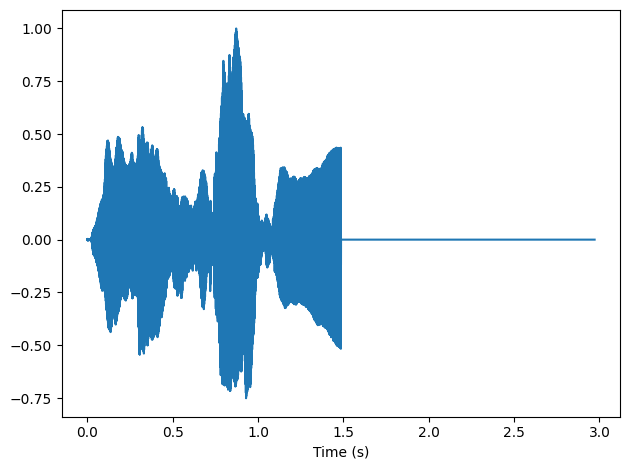

In [ ]:
violin = read_wave('92002__jcveliz__violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)

violin.truncate(2**16)
violin.zero_pad(2**17)

violin.normalize()
violin.plot()
decorate(xlabel='Time (s)')

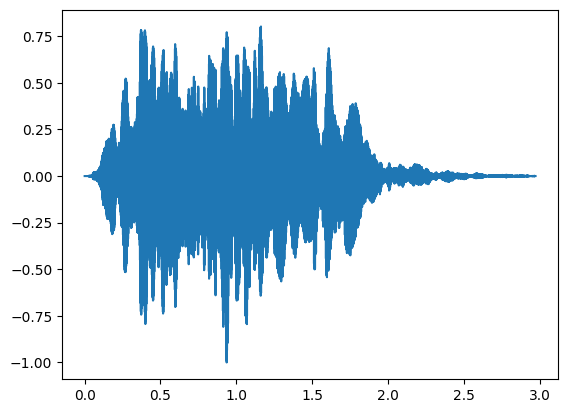

In [ ]:
spectrum = violin.make_spectrum()
output = (spectrum * transfer).make_wave()
output.normalize()
output.plot()
output.make_audio()

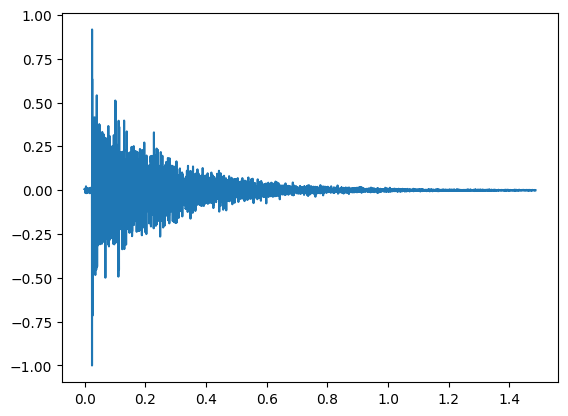

In [ ]:
response.truncate(2**16)
response.plot()

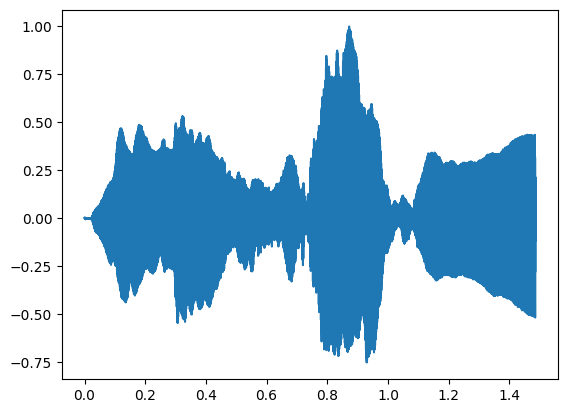

In [ ]:
violin.truncate(2**16)
violin.plot()

In [ ]:
output2 = violin.convolve(response)

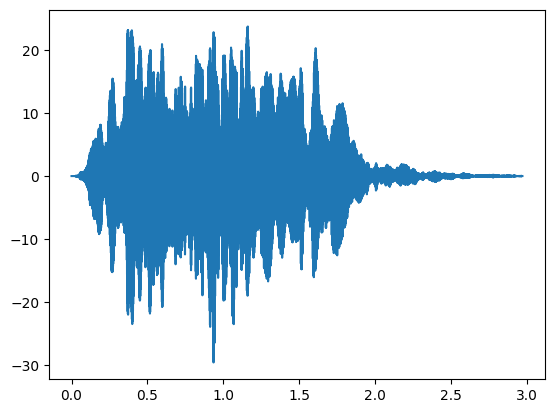

In [ ]:
output2.plot()
output2.make_audio()

Мы должны получить одинаковые результаты от np.convolve и scipy.signal.fftconvolve.
Сначала я удалю дополнение нулями:

In [ ]:
len(output), len(output2)

(131072, 131071)

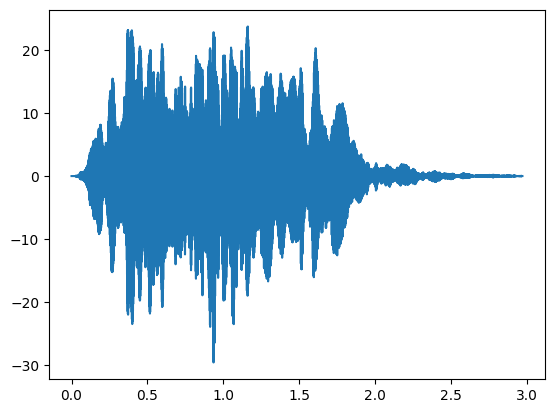

In [ ]:
from thinkdsp import Wave

import scipy.signal
ys = scipy.signal.fftconvolve(violin.ys, response.ys)
output3 = Wave(ys, framerate=violin.framerate)
output3.plot()
output3.make_audio()

И с учётом погрешности представления чисел с плавающей точкой, они одинаковы:

In [ ]:
output2.max_diff(output3)

np.float64(2.1316282072803006e-14)

Пункт 2

In [ ]:
if not os.path.exists('stalbans_a_mono.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/stalbans_a_mono.wav

--2025-05-15 08:44:06--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/stalbans_a_mono.wav
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/stalbans_a_mono.wav [following]
--2025-05-15 08:44:06--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/stalbans_a_mono.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793906 (775K) [audio/wav]
Saving to: ‘stalbans_a_mono.wav’

stalbans_a_mono.wav 100%[===================>] 775.30K  --.-KB/s    in 0.06s   

2025-05-15 08:44:07 (13.7 MB/s) - ‘stalbans_a_mono.wav’ saved [793906/793906]



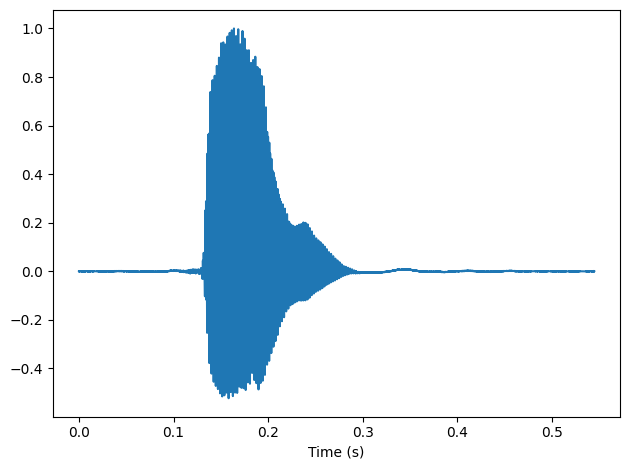

In [ ]:
response = read_wave('paphorn.wav')

start = 0
duration = 5
response = response.segment(duration=duration)
response.shift(-start)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

In [ ]:
response.make_audio()

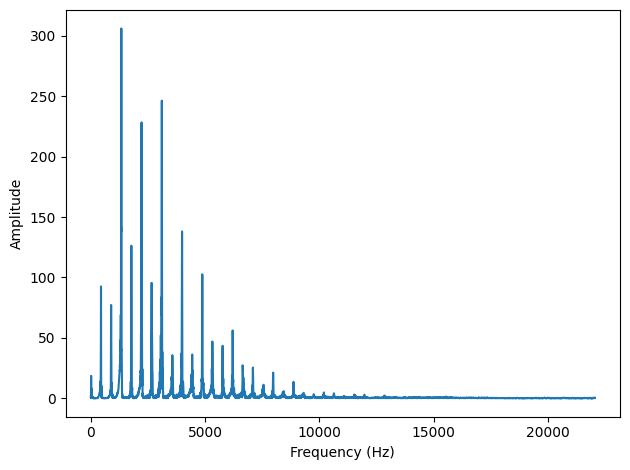

In [ ]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Вот передаточная функция на логарифмической шкале:

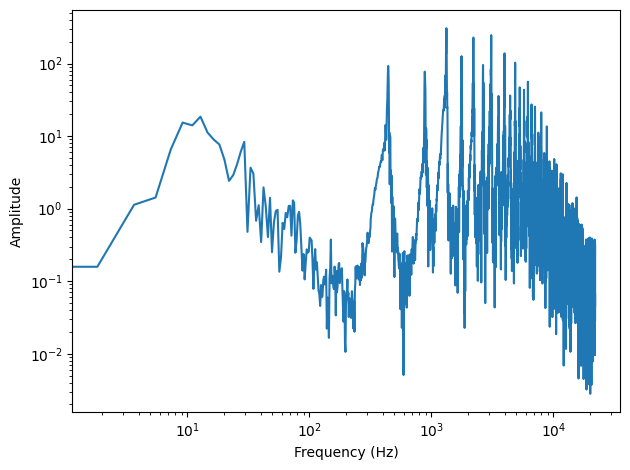

In [ ]:
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude',
         xscale='log', yscale='log')

In [ ]:
if not os.path.exists('170255__dublie__trumpet.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/170255__dublie__trumpet.wav

--2025-05-15 08:45:12--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/170255__dublie__trumpet.wav
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/170255__dublie__trumpet.wav [following]
--2025-05-15 08:45:13--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/170255__dublie__trumpet.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1540668 (1.5M) [audio/wav]
Saving to: ‘170255__dublie__trumpet.wav’

170255__dublie__tru 100%[===================>]   1.47M  --.-KB/s    in 0.07s   

2025-05-15 08:45:13 (21.9 MB/s) - ‘170255__dublie__tru

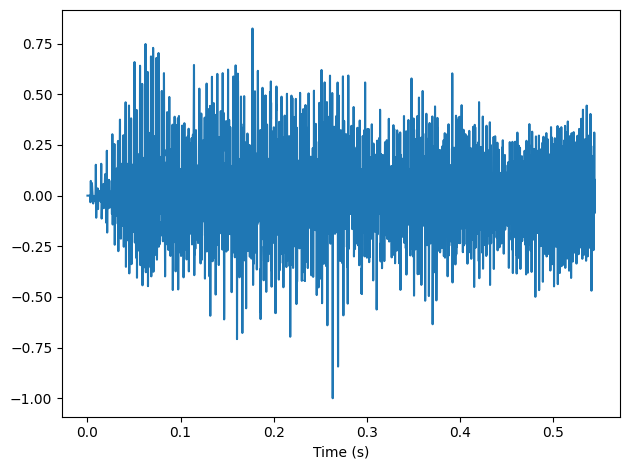

In [ ]:
wave = read_wave('170255__dublie__trumpet.wav')

start = 0.0
wave = wave.segment(start=start)
wave.shift(-start)

wave.truncate(len(response))
wave.normalize()
wave.plot()
decorate(xlabel='Time (s)')

In [ ]:
wave.make_audio()

In [ ]:
spectrum = wave.make_spectrum()
len(spectrum.hs), len(transfer.hs)

(12008, 12008)

In [ ]:
spectrum.fs

array([0.00000000e+00, 1.83635228e+00, 3.67270456e+00, ...,
       2.20454091e+04, 2.20472455e+04, 2.20490818e+04])

In [ ]:
transfer.fs

array([0.00000000e+00, 1.83635228e+00, 3.67270456e+00, ...,
       2.20454091e+04, 2.20472455e+04, 2.20490818e+04])

Теперь мы можем умножить в частотной области и преобразовать обратно в область времени.

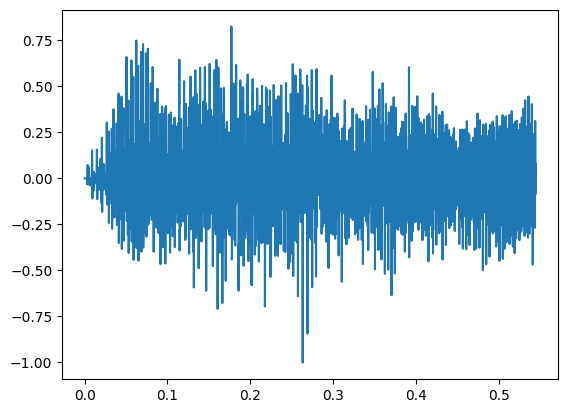

In [ ]:
output = (spectrum * transfer).make_wave()
output.normalize()
wave.plot()

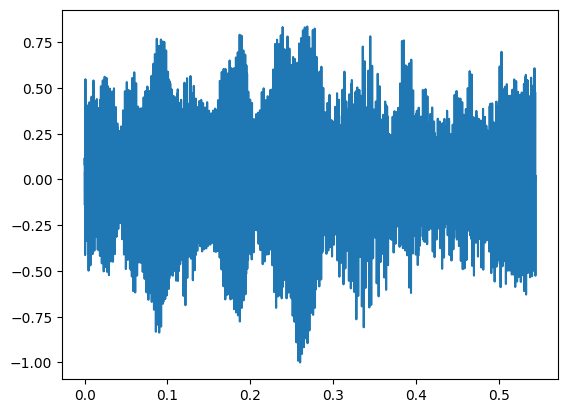

In [ ]:
output.plot()

In [ ]:
output.make_audio()

Теперь, когда мы распознаем эту операцию как свёртку, мы можем вычислить её с использованием метода convolve:

In [ ]:
convolved2 = wave.convolve(response)
convolved2.normalize()
convolved2.make_audio()